<a href="https://colab.research.google.com/github/haleychasteene/hsuec/blob/master/Assesses_Exercise_5_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
!pip install fiona
!pip install geopandas
import pandas as pd
import requests
import fiona
import geopandas as gpd
import ipywidgets as widgets

     |████████████████████████████████| 11.8MB 196kB/s 
     |████████████████████████████████| 921kB 9.5MB/s 
     |████████████████████████████████| 10.1MB 44.6MB/s 


In [2]:
url = 'http://ropitz.github.io/digitalantiquity/data/gabii_SU.geojson'
request = requests.get(url)
b = bytes(request.content)
with fiona.BytesCollection(b) as f:
    crs = f.crs
    gabii_su_poly = gpd.GeoDataFrame.from_features(f, crs=crs)
    print(gabii_su_poly.head())

                                            geometry  ...  Shape_Area
0  POLYGON Z ((1415906.023 5144201.194 64.774, 14...  ...    0.030028
1  POLYGON Z ((1415940.483 5144159.515 62.910, 14...  ...    0.567181
2  POLYGON Z ((1415956.547 5144171.764 62.566, 14...  ...    0.030045
3  POLYGON Z ((1415955.891 5144171.889 62.624, 14...  ...    0.030902
4  POLYGON Z ((1415956.267 5144171.289 62.618, 14...  ...    0.170833

[5 rows x 6 columns]


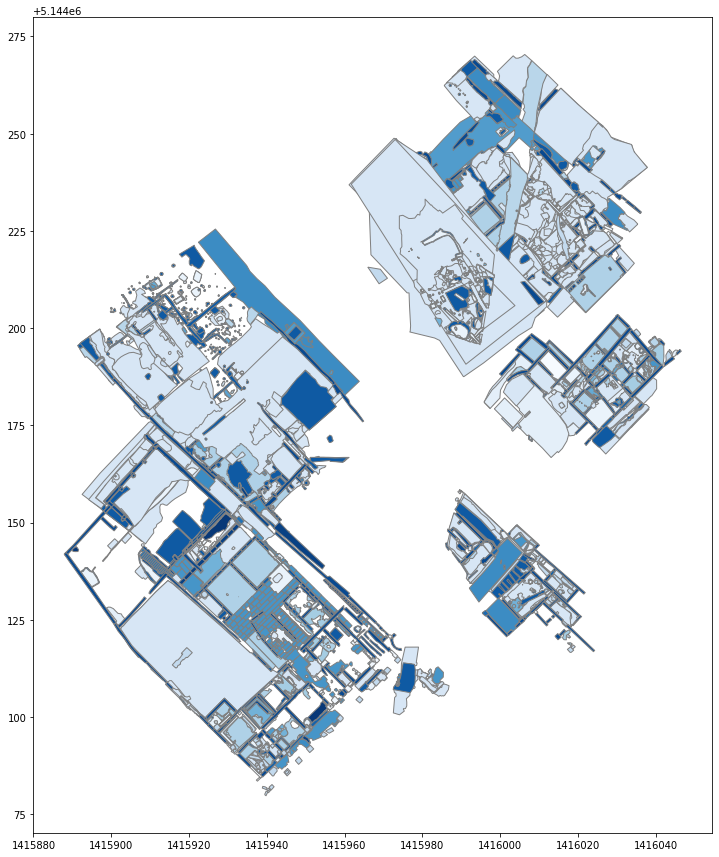

In [3]:
gabii_map1 = gabii_su_poly.plot(column='DESCRIPTIO', cmap='Blues', edgecolor='grey', figsize=(15, 15));

In [4]:
sf_su = pd.read_csv("https://raw.githubusercontent.com/ropitz/gabii_experiments/master/spf_SU.csv")
sf_su

,SU,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
0,0,1,coin,Coin
1,0,15,coin,Coin
2,0,18,coin,Coin
3,0,80,ceramic fragment,Ceramic Fragment
4,0,82,fish hook,NaN
...,...,...,...,...
2639,8365,2749,Bronze hair pin,Pin
2640,8365,2751,Lead Weight,Metal Object
2641,8365,2758,african red slip fragment with a moulded face.,Ceramic Fragment
2642,8375,2720,Iron blade,Blade


In [6]:
sf_su_desc = sf_su['SF_OBJECT_TYPE']
set(sf_su_desc)

{' Area B',
 ' Area H"',
 ' along with a crescent (maybe a boat?). Weight 1.370 kg. Large fragment of buff colored tile with red inclusions. Photo model completed by Thomas Kocjan during the AAR Digital Documentation session in 2017."',
 ' given its characteristic fabric and bulging toe. Situated just above the toe is an upside-down gamma-shaped incision (appears like a backwards L with toe pointed downwards). Peacock & Williams (1986) pp. 155-157 place the production dates of these amphora between the late second century and late fourth century AD (which fits with other material from SU)."',
 ' hole drilled in break"',
 ' indicating that the stamp was produced in the year of the consuls Apronianus and Paetinus in 123 CE. The lower line reads ""*EV" likely indicating the name of the workshop"',
 ' possibly the bulk excavated section from which other chain pieces were microexcavated. "',
 ' the conservator (check?)) with cylindrical silver/bronze beads inside. ',
 ' topo point taken.',


In [16]:
types = ['Sarcophagus','Votive','Altar']
sacred_items = sf_su.loc[sf_su['SF_OBJECT_TYPE'].isin(types)]
sacred_items

,SU,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
72,0,1020,votive,Votive
231,321,1848,miniature vessel,Votive
275,419,156,complete vessel,Votive
290,461,241,complete vessel,Votive
293,461,248,complete vessel,Votive
419,1242,213,Decorated terracotta fragment,Altar
422,1275,227,miniature vessel,Votive
435,1306,281,complete vessel,Votive
438,1320,278,complete vessel,Votive
490,1385,412,altar,Altar


In [17]:
pd.value_counts(sacred_items['SU'].values, sort=True)

6058    10
3318     7
3267     6
461      2
1406     1
3804     1
3542     1
2451     1
3305     1
3736     1
3727     1
3715     1
5081     1
5016     1
2561     1
3606     1
6020     1
3074     1
321      1
2840     1
3227     1
1242     1
2237     1
3004     1
1275     1
6073     1
4020     1
1306     1
3635     1
3116     1
3051     1
1385     1
1320     1
7076     1
419      1
2338     1
2269     1
3786     1
0        1
dtype: int64

In [18]:
gabii_sacreditems = gabii_su_poly.merge(sacred_items, on='SU')
gabii_sacreditems.head()

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
0,"POLYGON Z ((1415935.544 5144182.803 63.413, 14...",77,DEP,1306,35.183961,21.609902,281,complete vessel,Votive
1,"POLYGON Z ((1415936.546 5144155.562 62.923, 14...",215,DEP,1320,20.571078,26.998229,278,complete vessel,Votive
2,"POLYGON Z ((1415997.814 5144211.857 61.407, 14...",233,DEP,3004,107.503572,568.878318,1043,votive,Votive
3,"POLYGON Z ((1415997.814 5144211.857 61.407, 14...",4247,DEP,3004,107.503572,568.878318,1043,votive,Votive
4,"POLYGON Z ((1416006.860 5144219.020 61.322, 14...",279,FILL,2237,7.817196,3.887545,314,ceramic object,Altar


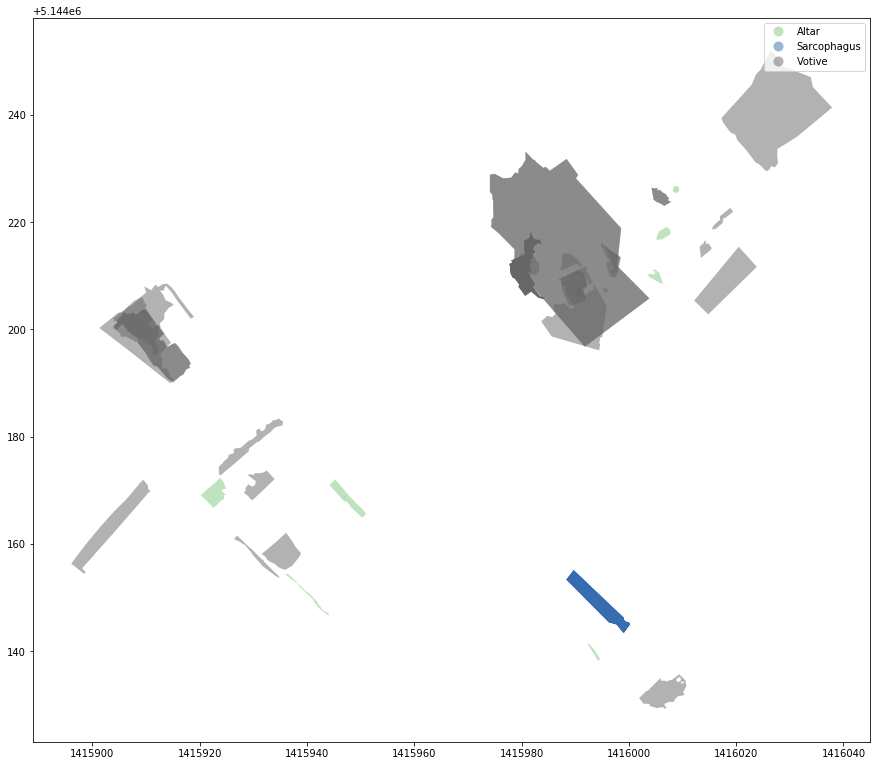

In [19]:
gabii_sacreditems.plot(column='SF_OBJECT_TYPE', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)

In [20]:
gabii_sacreditems.sort_values(by=['Shape_Area'],ascending=False)

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
2,"POLYGON Z ((1415997.814 5144211.857 61.407, 14...",233,DEP,3004,107.503572,568.878318,1043,votive,Votive
3,"POLYGON Z ((1415997.814 5144211.857 61.407, 14...",4247,DEP,3004,107.503572,568.878318,1043,votive,Votive
15,"POLYGON Z ((1416017.249 5144239.390 61.415, 14...",1916,DEP,4020,64.057271,224.000624,527,miniature votive lamp,Votive
5,"POLYGON Z ((1415913.936 5144208.526 64.914, 14...",1286,DEP,321,74.506928,112.388726,1848,miniature vessel,Votive
22,"POLYGON Z ((1415983.670 5144201.512 61.068, 14...",2940,DEP,3227,42.324453,83.100522,679,votive,Votive
...,...,...,...,...,...,...,...,...,...
43,"POLYGON Z ((1415990.436 5144207.847 0.000, 141...",4927,DEP,3786,5.148702,1.417752,1549,Votive fragment,Votive
18,"POLYGON Z ((1416009.365 5144226.330 61.061, 14...",2166,FILL,2338,3.988816,1.183521,487,altar,Altar
44,"POLYGON Z ((1415995.625 5144206.824 60.643, 14...",4944,DEP,3804,2.750682,0.491091,1625,votive bread fragment,Votive
37,"POLYGON Z ((1415991.715 5144207.704 60.918, 14...",4289,DEP,3542,1.824894,0.159929,1345,Fragment of votive,Votive


In [0]:
gabii_sacreditems2 = gabii_sacreditems.loc[gabii_sacreditems['Shape_Area']<800]

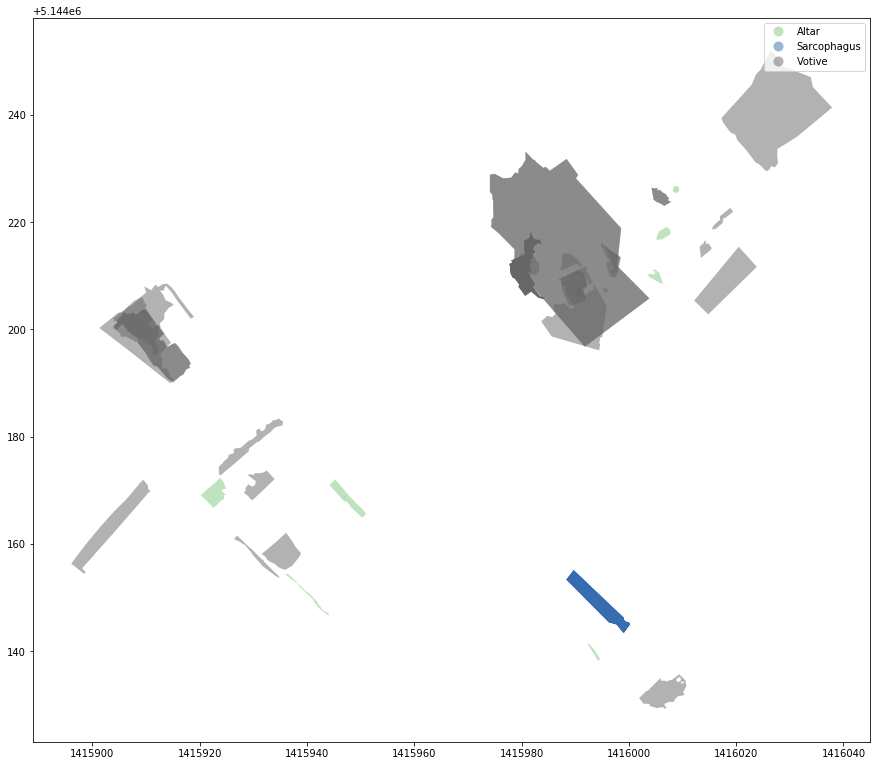

In [25]:
gabii_sacreditems2.plot(column='SF_OBJECT_TYPE', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)


In [26]:
sacreditems_counts = gabii_sacreditems2.groupby('SU')['SF_OBJECT_TYPE'].value_counts().unstack().fillna(0)
sacreditems_counts.sort_values(by=['Sarcophagus','Votive','Altar'], ascending=False)

SF_OBJECT_TYPE,Altar,Sarcophagus,Votive
SU,,,
6058,0.0,10.0,0.0
3318,0.0,0.0,7.0
3267,0.0,0.0,6.0
461,0.0,0.0,2.0
2840,0.0,0.0,2.0
3004,0.0,0.0,2.0
321,0.0,0.0,1.0
419,0.0,0.0,1.0
1275,0.0,0.0,1.0


In [27]:
gabii_sacreditems_counts = gabii_su_poly.merge(sacreditems_counts, on='SU')
gabii_sacreditems_counts.head()

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,Altar,Sarcophagus,Votive
0,"POLYGON Z ((1415935.544 5144182.803 63.413, 14...",77,DEP,1306,35.183961,21.609902,0.0,0.0,1.0
1,"POLYGON Z ((1415936.546 5144155.562 62.923, 14...",215,DEP,1320,20.571078,26.998229,0.0,0.0,1.0
2,"POLYGON Z ((1415997.814 5144211.857 61.407, 14...",233,DEP,3004,107.503572,568.878318,0.0,0.0,2.0
3,"POLYGON Z ((1415997.814 5144211.857 61.407, 14...",4247,DEP,3004,107.503572,568.878318,0.0,0.0,2.0
4,"POLYGON Z ((1416006.860 5144219.020 61.322, 14...",279,FILL,2237,7.817196,3.887545,1.0,0.0,0.0


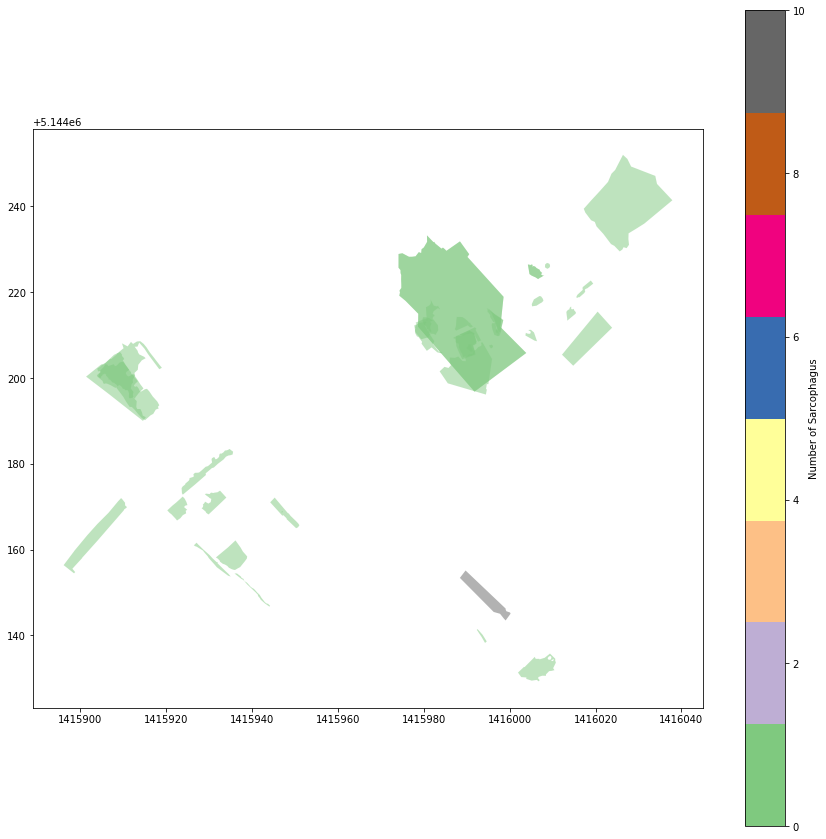

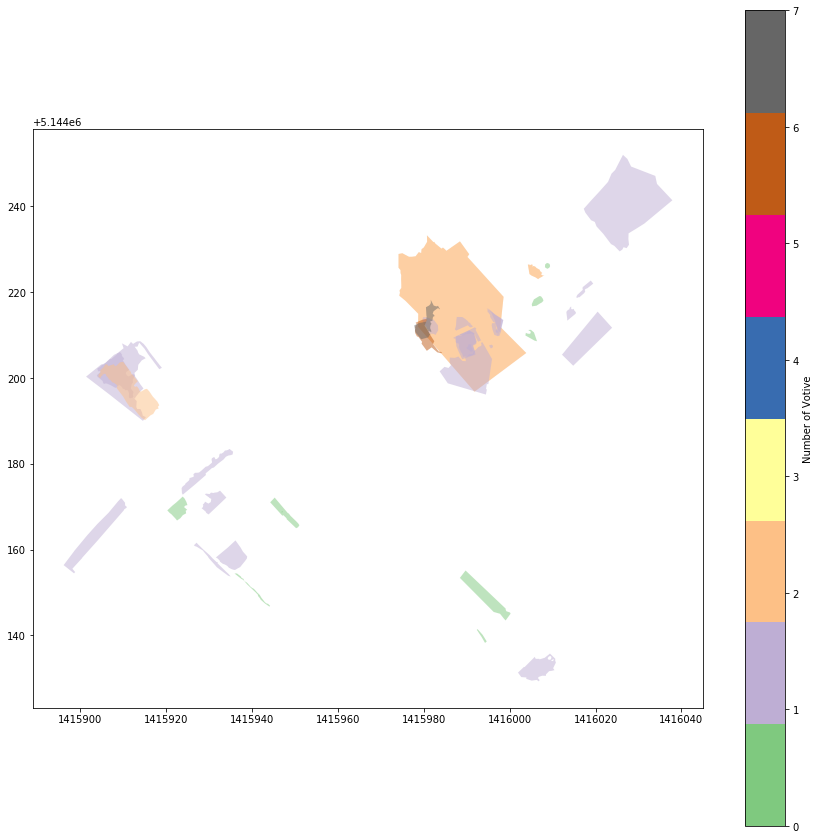

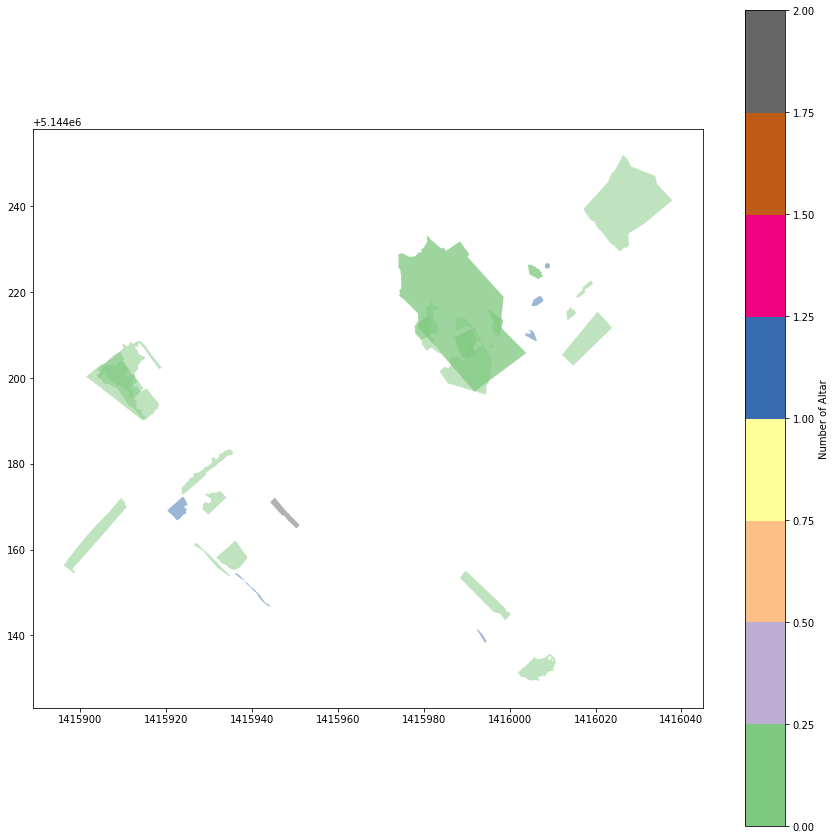

In [28]:
gabii_sacreditems_counts.plot(column='Sarcophagus', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5, legend_kwds={'label': "Number of Sarcophagus",'orientation': "vertical"})
gabii_sacreditems_counts.plot(column='Votive', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5, legend_kwds={'label': "Number of Votive",'orientation': "vertical"})
gabii_sacreditems_counts.plot(column='Altar', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5, legend_kwds={'label': "Number of Altar",'orientation': "vertical"})

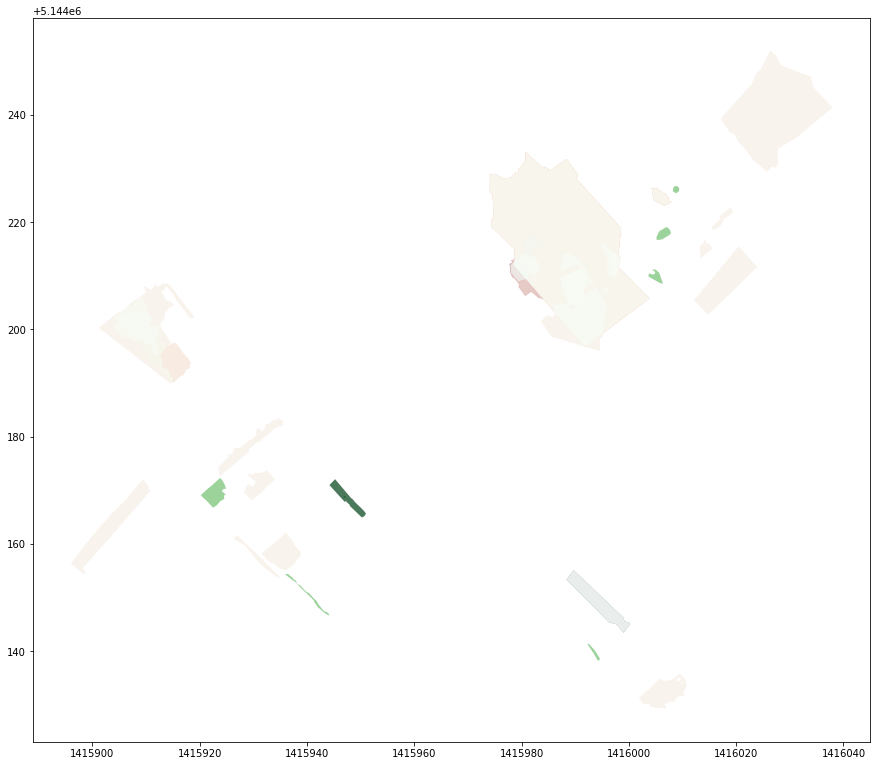

In [29]:
base = gabii_sacreditems_counts.plot(column='Sarcophagus', cmap='Blues', figsize=(15, 15), alpha=0.7)
gabii_sacreditems_counts.plot(ax=base, column='Votive', cmap='Reds', alpha=0.7)
gabii_sacreditems_counts.plot(ax=base, column='Altar', cmap='Greens', alpha=0.7);

In [0]:
import matplotlib.pyplot as plt

(1415888.9840549997, 1416044.978245, 5144123.15661, 5144258.08019)

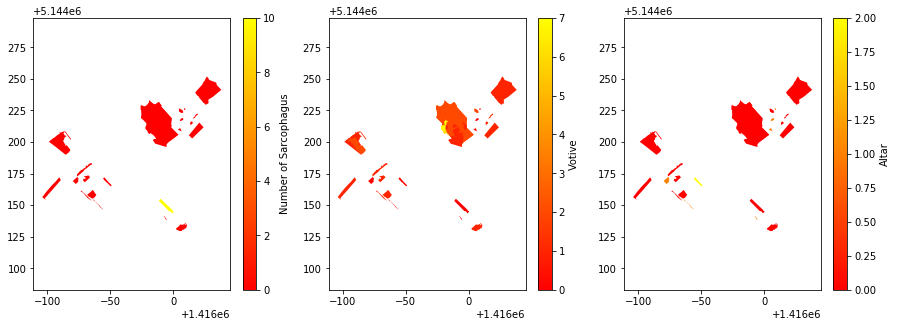

In [31]:
fig, axes = plt.subplots(ncols=3,figsize=(15, 5))
gabii_sacreditems_counts.plot(column='Sarcophagus', cmap='autumn',  ax=axes[0], legend=True, legend_kwds={'label': "Number of Sarcophagus",'orientation': "vertical"}).axis('equal')
gabii_sacreditems_counts.plot(column='Votive', cmap='autumn', ax=axes[1], legend=True, legend_kwds={'label': "Votive",'orientation': "vertical"}).axis('equal')
gabii_sacreditems_counts.plot(column='Altar', cmap='autumn',ax=axes[2], legend=True, legend_kwds={'label': "Altar",'orientation': "vertical"}).axis('equal')


In [34]:
#@title
!apt-get install -qq curl g++ make
#@title
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
#@title
import os
os.chdir('spatialindex-src-1.8.5')
#@title
!./configure
#@title
!make
#@title
!make install
#@title
!pip install rtree
#@title
!ldconfig
#Working through the example at http://toblerity.org/rtree/examples.html
#@title
from rtree import index
from rtree.index import Rtree
#@title
p = index.Property()
idx = index.Index(properties=p)
idx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   422k      0  0:00:01  0:00:01 --:--:--  422k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [35]:
!pip install pysal
import pysal
from sklearn import cluster
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"


In [36]:
km5 = cluster.KMeans(n_clusters=5)
km5cls = km5.fit(gabii_sacreditems_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU'], axis=1).values)
km5cls

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

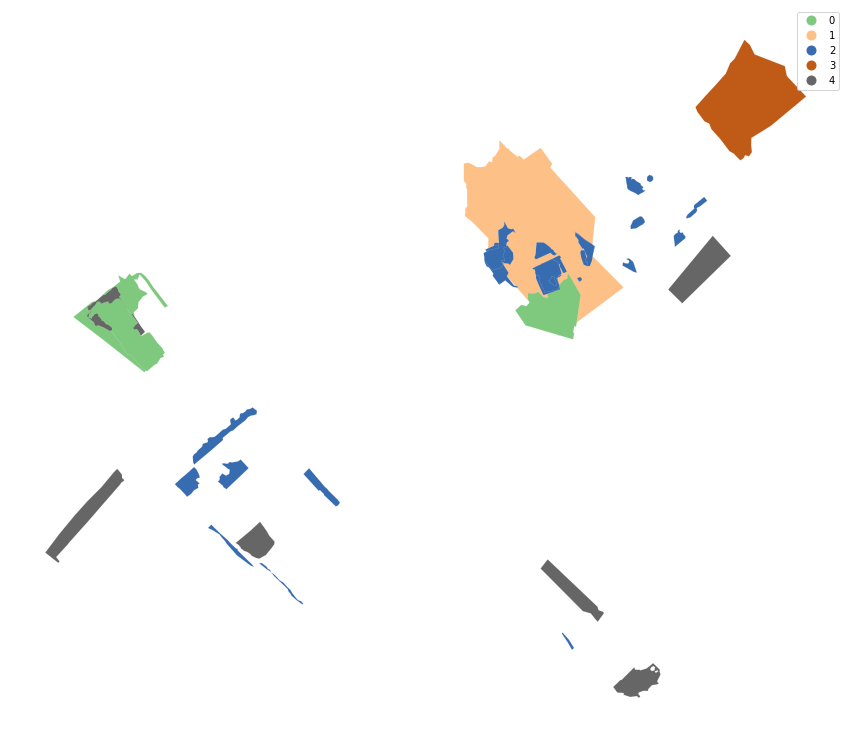

In [38]:
f1, ax = plt.subplots(1, figsize=(15,15))
gabii_sacreditems_counts.assign(cl=km5cls.labels_)\
   .plot(column='cl', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)
ax.set_axis_off()
plt.show()


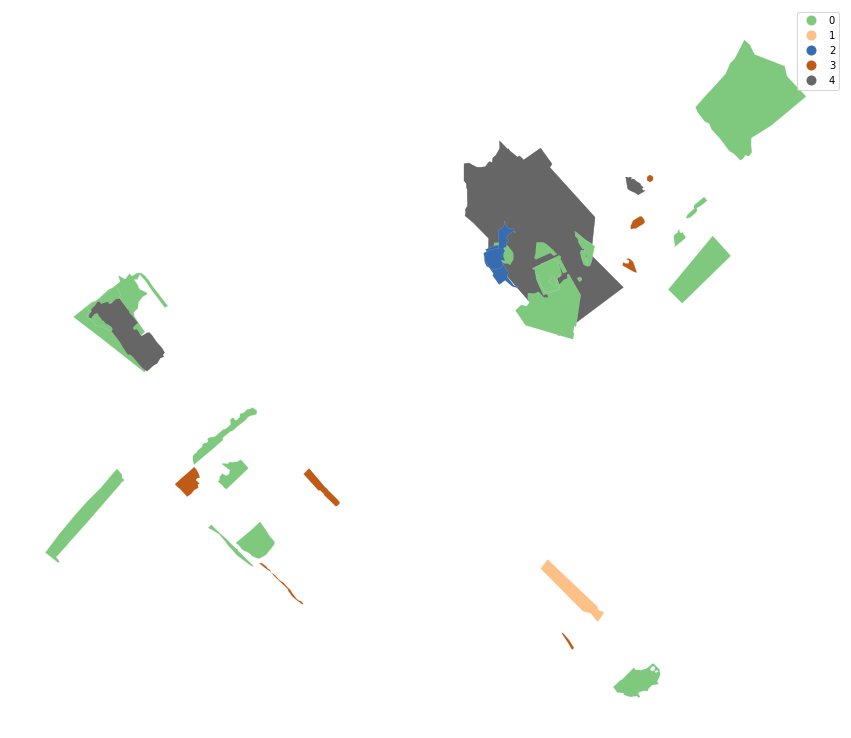

In [39]:
km5 = cluster.KMeans(n_clusters=5)
km5cls2 = km5.fit(gabii_sacreditems_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU','Shape_Area'], axis=1).values)
f2, ax = plt.subplots(1, figsize=(15,15))

gabii_sacreditems_counts.assign(cl2=km5cls2.labels_)\
   .plot(column='cl2', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

(1415888.9840549997, 1416044.978245, 5144123.15661, 5144258.08019)

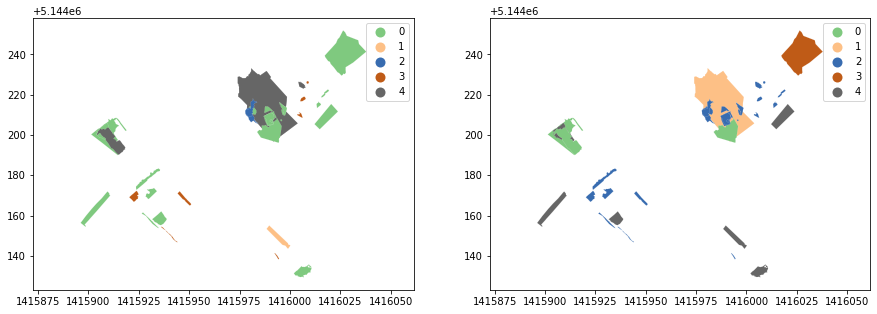

In [41]:
fig, axes = plt.subplots(ncols=2,figsize=(15, 5))


gabii_sacreditems_counts.assign(cl2=km5cls2.labels_)\
   .plot(column='cl2', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=axes[0]).axis('equal')
gabii_sacreditems_counts.assign(cl=km5cls.labels_)\
   .plot(column='cl', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=axes[1]).axis('equal')


In [43]:
gabiisacreditems_clas = gabii_sacreditems_counts.assign(cl=km5cls.labels_)
gabiisacreditems_class = gabiisacreditems_clas.assign(cl2=km5cls2.labels_)
gabiisacreditems_class.head()

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,Altar,Sarcophagus,Votive,cl,cl2
0,"POLYGON Z ((1415935.544 5144182.803 63.413, 14...",77,DEP,1306,35.183961,21.609902,0.0,0.0,1.0,2,0
1,"POLYGON Z ((1415936.546 5144155.562 62.923, 14...",215,DEP,1320,20.571078,26.998229,0.0,0.0,1.0,4,0
2,"POLYGON Z ((1415997.814 5144211.857 61.407, 14...",233,DEP,3004,107.503572,568.878318,0.0,0.0,2.0,1,4
3,"POLYGON Z ((1415997.814 5144211.857 61.407, 14...",4247,DEP,3004,107.503572,568.878318,0.0,0.0,2.0,1,4
4,"POLYGON Z ((1416006.860 5144219.020 61.322, 14...",279,FILL,2237,7.817196,3.887545,1.0,0.0,0.0,2,3


(1415888.9840549997, 1416044.978245, 5144123.15661, 5144258.08019)

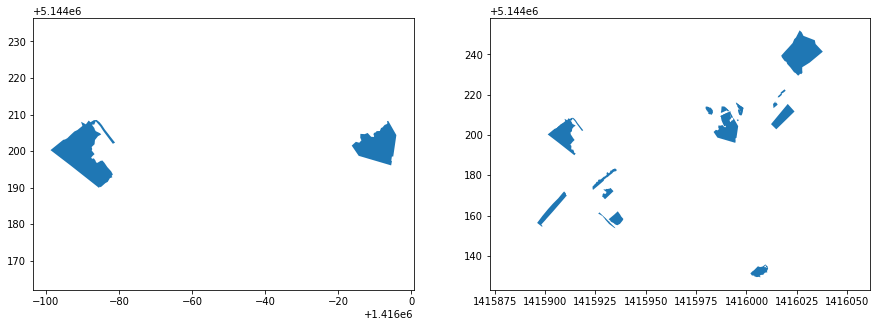

In [44]:
gabiisacreditems_class0=gabiisacreditems_class.loc[gabiisacreditems_class['cl']==0]
gabiisacreditems_class0noarea=gabiisacreditems_class.loc[gabiisacreditems_class['cl2']==0]

fig, axes = plt.subplots(ncols=2,figsize=(15, 5))
gabiisacreditems_class0.plot(ax=axes[0], legend=True).axis('equal')
gabiisacreditems_class0noarea.plot(ax=axes[1]).axis('equal')

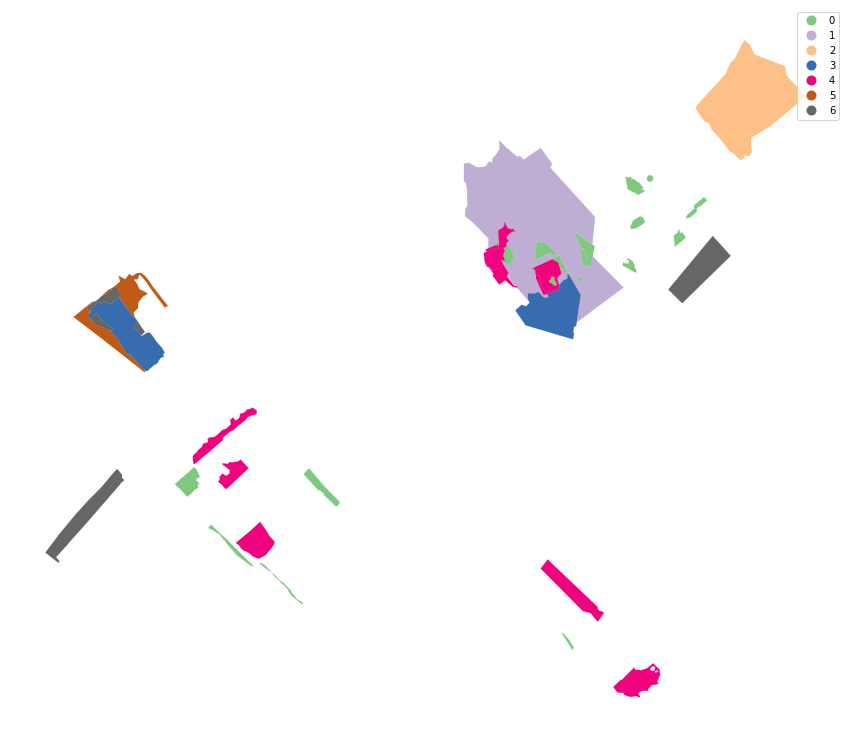

In [45]:
km7 = cluster.KMeans(n_clusters=7)
km7cls3 = km7.fit(gabii_sacreditems_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU'], axis=1).values)
f3, ax = plt.subplots(1, figsize=(15,15))

gabii_sacreditems_counts.assign(cl3=km7cls3.labels_)\
   .plot(column='cl3', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

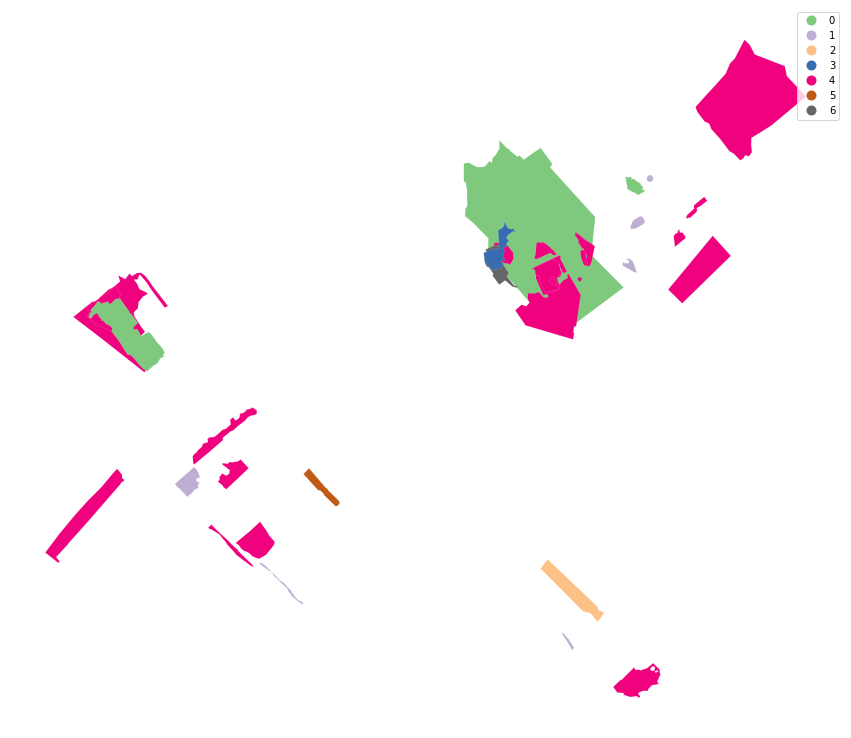

In [46]:
km7 = cluster.KMeans(n_clusters=7)
km7cls4 = km7.fit(gabii_sacreditems_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU','Shape_Area'], axis=1).values)
f4, ax = plt.subplots(1, figsize=(15,15))

gabii_sacreditems_counts.assign(cl4=km7cls4.labels_)\
   .plot(column='cl4', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

In [47]:
gabiisacreditems_class3=gabiisacreditems_class.assign(cl3=km7cls3.labels_)
gabiisacreditems_class4=gabiisacreditems_class3.assign(cl4=km7cls4.labels_)
gabiisacreditems_class4.head()

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,Altar,Sarcophagus,Votive,cl,cl2,cl3,cl4
0,"POLYGON Z ((1415935.544 5144182.803 63.413, 14...",77,DEP,1306,35.183961,21.609902,0.0,0.0,1.0,2,0,4,4
1,"POLYGON Z ((1415936.546 5144155.562 62.923, 14...",215,DEP,1320,20.571078,26.998229,0.0,0.0,1.0,4,0,4,4
2,"POLYGON Z ((1415997.814 5144211.857 61.407, 14...",233,DEP,3004,107.503572,568.878318,0.0,0.0,2.0,1,4,1,0
3,"POLYGON Z ((1415997.814 5144211.857 61.407, 14...",4247,DEP,3004,107.503572,568.878318,0.0,0.0,2.0,1,4,1,0
4,"POLYGON Z ((1416006.860 5144219.020 61.322, 14...",279,FILL,2237,7.817196,3.887545,1.0,0.0,0.0,2,3,0,1


Text(0.5, 1, '7 clusters - no area')

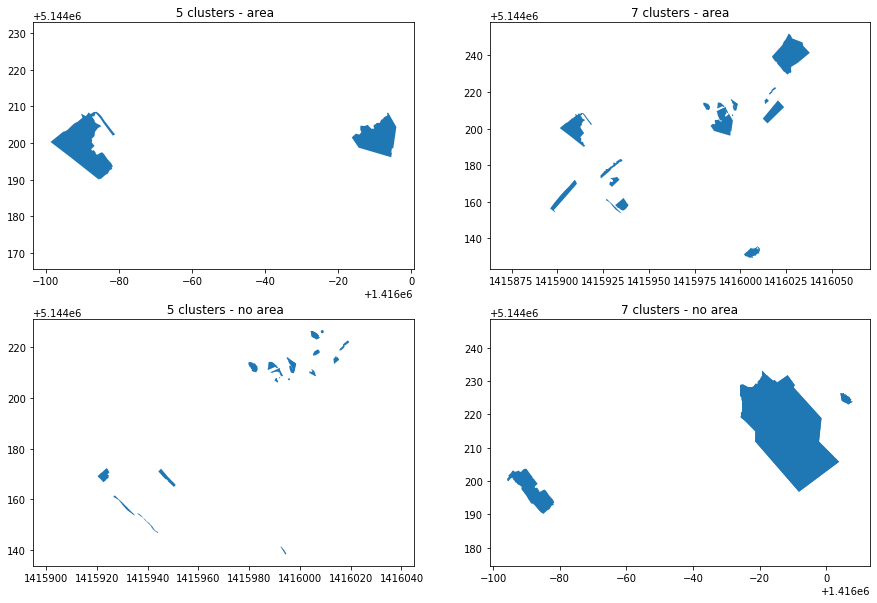

In [48]:
gabiisacreditems_class0=gabiisacreditems_class4.loc[gabiisacreditems_class4['cl']==0]
gabiisacreditems_class0noarea=gabiisacreditems_class4.loc[gabiisacreditems_class4['cl2']==0]
gabiisacreditems_k7_class0=gabiisacreditems_class4.loc[gabiisacreditems_class4['cl3']==0]
gabiisacreditems_k7_class0noarea=gabiisacreditems_class4.loc[gabiisacreditems_class4['cl4']==0]

fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(15, 10))

gabiisacreditems_class0.plot(ax=axes[0,0]).axis('equal')

axes[0,0].set_title(' 5 clusters - area')

gabiisacreditems_class0noarea.plot(ax=axes[0,1]).axis('equal')
axes[1,0].set_title(' 5 clusters - no area')
gabiisacreditems_k7_class0.plot(ax=axes[1,0]).axis('equal')
axes[0,1].set_title('7 clusters - area')
gabiisacreditems_k7_class0noarea.plot(ax=axes[1,1]).axis('equal')
axes[1,1].set_title('7 clusters - no area')

Text(0.5, 1, '7 clusters - no area')

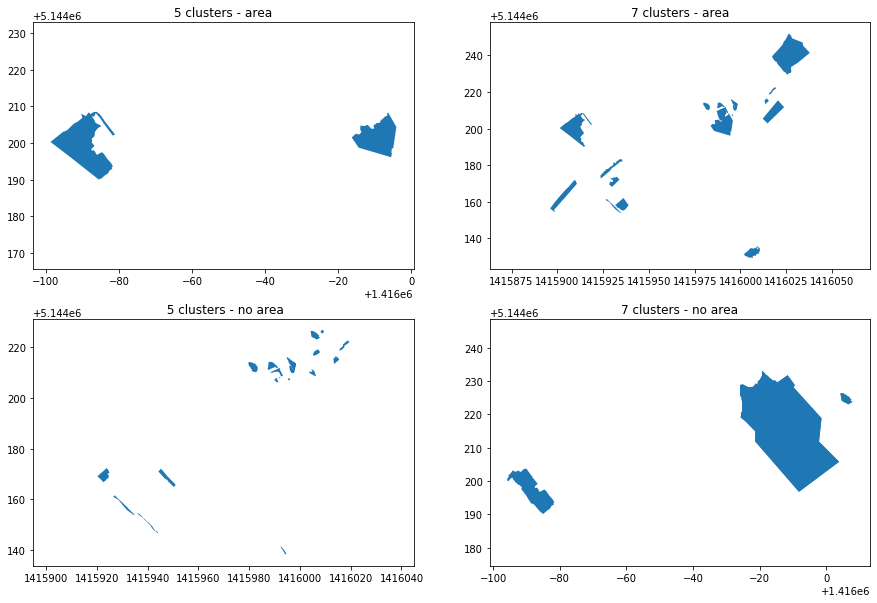

In [49]:
gabiisacreditems_class3=gabiisacreditems_class4.loc[gabiisacreditems_class4['cl']==3]
gabiisacreditems_class3noarea=gabiisacreditems_class4.loc[gabiisacreditems_class4['cl2']==3]
gabiisacreditems_k7_class3=gabiisacreditems_class4.loc[gabiisacreditems_class4['cl3']==3]
gabiisacreditems_k7_class3noarea=gabiisacreditems_class4.loc[gabiisacreditems_class4['cl4']==3]


fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(15, 10))
gabiisacreditems_class0.plot(ax=axes[0,0]).axis('equal')
axes[0,0].set_title('5 clusters - area')
gabiisacreditems_class0noarea.plot(ax=axes[0,1]).axis('equal')
axes[1,0].set_title(' 5 clusters - no area')
gabiisacreditems_k7_class0.plot(ax=axes[1,0]).axis('equal')
axes[0,1].set_title('7 clusters - area')
gabiisacreditems_k7_class0noarea.plot(ax=axes[1,1]).axis('equal')
axes[1,1].set_title('7 clusters - no area')

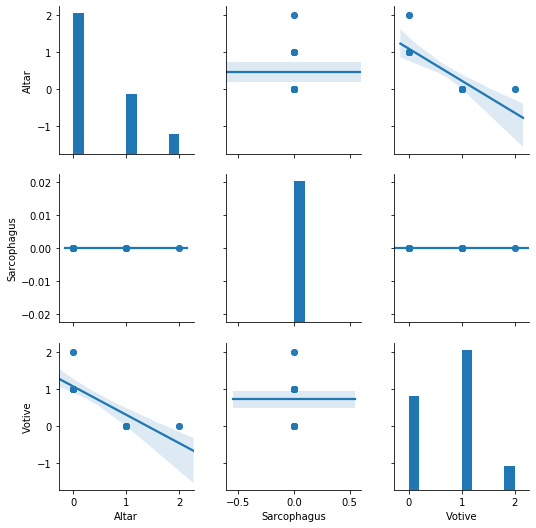

In [50]:
sns.pairplot(gabiisacreditems_k7_class0.drop(['OBJECTID','DESCRIPTIO','Shape_Length','Shape_Area','SU','geometry','cl','cl2','cl3','cl4'], axis=1), kind="reg")
plt.show()

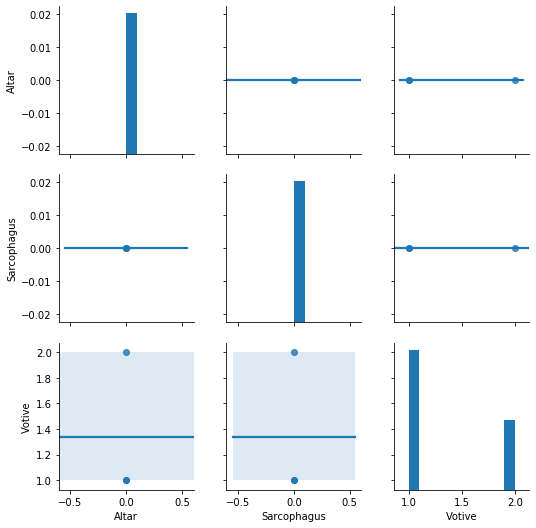

In [51]:
sns.pairplot(gabiisacreditems_class0.drop(['OBJECTID','DESCRIPTIO','Shape_Length','Shape_Area','SU','geometry','cl','cl2','cl3','cl4'], axis=1), kind="reg")
plt.show()